# **Loan Approval Prediction**
> 😊 In this project we are going to build a `Loan Prediction Project`

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading Data and Visualizing it

In [2]:
df = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Dropping all the null value rows
df = df.dropna()

In [10]:
df.duplicated().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

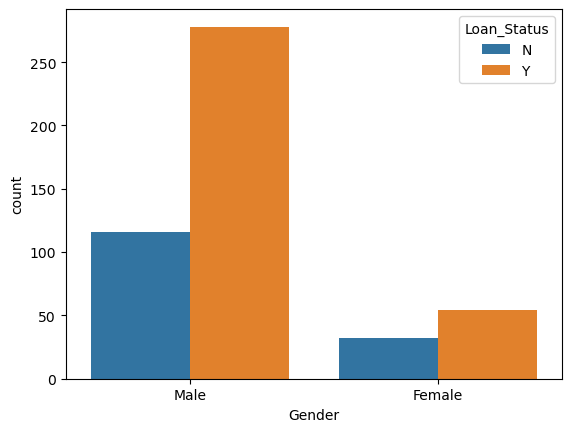

In [11]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<Axes: xlabel='Education', ylabel='count'>

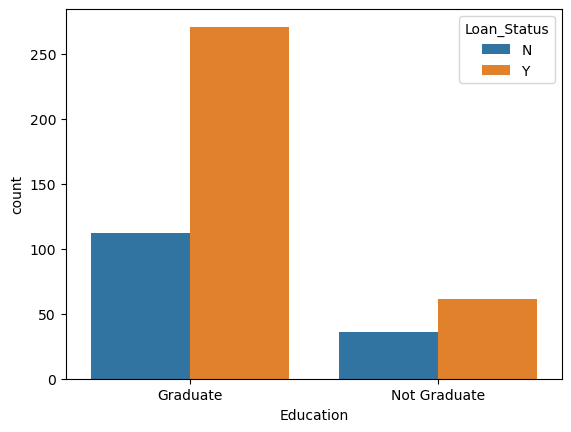

In [12]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

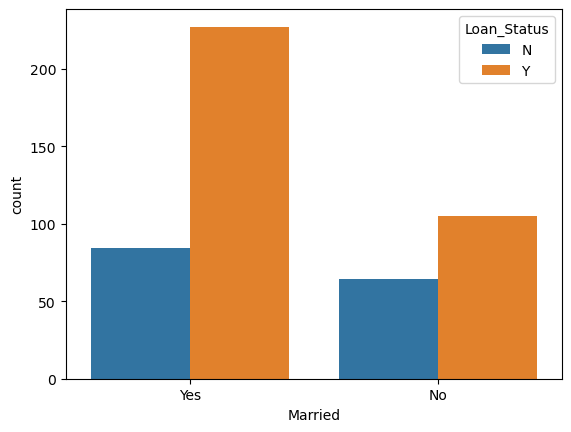

In [13]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

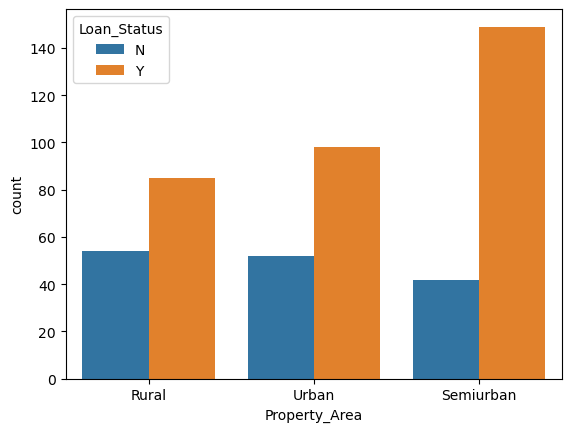

In [14]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

## Data Preprocessing

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [16]:
df.shape

(480, 13)

In [17]:
# Label Encoding Gender, Married, Education, Self_Employedm, Property Area, Loan Status
df.replace({'Gender': {'Male': 0, 'Female': 0},
            'Married': {'Yes': 1, 'No': 0},
            'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 4},
            'Education': {'Graduate': 1, 'Not Graduate': 0},
            'Self_Employed': {'Yes': 1, 'No': 0},
            'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
            'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
df = df.sample(frac=1)

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
606,LP002961,0,1,1,1,0,3400,2500.0,173.0,360.0,1.0,1,1
300,LP001964,0,1,0,0,0,1800,2934.0,93.0,360.0,0.0,2,0
303,LP001977,0,1,1,1,0,1625,1803.0,96.0,360.0,1.0,2,1
306,LP001993,0,0,0,1,0,3762,1666.0,135.0,360.0,1.0,0,1
375,LP002211,0,1,0,1,0,4817,923.0,120.0,180.0,1.0,2,1


In [21]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1).values
y = df['Loan_Status'].values

In [22]:
X

array([[  0.,   1.,   1., ..., 360.,   1.,   1.],
       [  0.,   1.,   0., ..., 360.,   0.,   2.],
       [  0.,   1.,   1., ..., 360.,   1.,   2.],
       ...,
       [  0.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   1.,   0.],
       [  0.,   0.,   0., ..., 360.,   1.,   0.]])

In [23]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((384, 11), (384,), (96, 11), (96,))

In [26]:
X_train

array([[  0.,   0.,   0., ..., 360.,   0.,   1.],
       [  0.,   1.,   4., ..., 180.,   1.,   2.],
       [  0.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  0.,   1.,   0., ..., 360.,   1.,   0.],
       [  0.,   0.,   0., ..., 360.,   1.,   0.],
       [  0.,   1.,   2., ..., 300.,   1.,   0.]])

## Normalizing Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[ 0.        , -1.35810325, -0.70931157, ...,  0.27812822,
        -2.37079937, -0.04407438],
       [ 0.        ,  0.73632104,  2.47636846, ..., -2.40083259,
         0.42179866,  1.25781503],
       [ 0.        ,  0.73632104, -0.70931157, ...,  0.27812822,
         0.42179866,  1.25781503],
       ...,
       [ 0.        ,  0.73632104, -0.70931157, ...,  0.27812822,
         0.42179866, -1.34596379],
       [ 0.        , -1.35810325, -0.70931157, ...,  0.27812822,
         0.42179866, -1.34596379],
       [ 0.        ,  0.73632104,  0.88352845, ..., -0.61485871,
         0.42179866, -1.34596379]])

## Model Building

In [29]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to fil

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [31]:
model = Sequential()

# building model
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compiling model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [32]:
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[create_model_checkpoint('Dense_model')]
)

Epoch 1/50
24/24 [==============================] - 6s 52ms/step - loss: 0.6335 - accuracy: 0.6771 - val_loss: 0.5538 - val_accuracy: 0.7708
Epoch 2/50
24/24 [==============================] - 1s 36ms/step - loss: 0.5369 - accuracy: 0.7786 - val_loss: 0.5013 - val_accuracy: 0.8542
Epoch 3/50
24/24 [==============================] - 1s 36ms/step - loss: 0.4846 - accuracy: 0.8073 - val_loss: 0.4679 - val_accuracy: 0.8333
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4600 - accuracy: 0.8177 - val_loss: 0.4680 - val_accuracy: 0.8125
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.4369 - accuracy: 0.8281 - val_loss: 0.4806 - val_accuracy: 0.8021
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.8255 - val_loss: 0.4836 - val_accuracy: 0.8125
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.8333 - val_loss: 0.4845 - val_accuracy: 0.8125
Epoch 8/50
24/24 

## Model Evaluation

In [33]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.1497 - accuracy: 0.6771


[1.1496928930282593, 0.6770833134651184]

In [34]:
model = tf.keras.models.load_model('/kaggle/working/model_experiments/Dense_model')
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8333


[0.46794191002845764, 0.8333333134651184]

In [35]:
y_preds = tf.round(model.predict(X_test))

3/3 [==============================] - 0s 3ms/step


In [36]:
y_preds = tf.squeeze(y_preds)

In [37]:
y_preds.shape, y_test.shape

(TensorShape([96]), (96,))

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print(f'Accuracy : {accuracy_score(y_test, y_preds)}')
print(f'Precision : {precision_score(y_test, y_preds)}')
print(f'Recall : {recall_score(y_test, y_preds)}')
print(f'F1 : {f1_score(y_test, y_preds)}')
print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_preds)}')

Accuracy : 0.8333333333333334
Precision : 0.8414634146341463
Recall : 0.9583333333333334
F1 : 0.8961038961038961
Confusion Matrix : 
[[11 13]
 [ 3 69]]


In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
606,LP002961,0,1,1,1,0,3400,2500.0,173.0,360.0,1.0,1,1
300,LP001964,0,1,0,0,0,1800,2934.0,93.0,360.0,0.0,2,0
303,LP001977,0,1,1,1,0,1625,1803.0,96.0,360.0,1.0,2,1
306,LP001993,0,0,0,1,0,3762,1666.0,135.0,360.0,1.0,0,1
375,LP002211,0,1,0,1,0,4817,923.0,120.0,180.0,1.0,2,1


In [40]:
X[0]

array([0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 3.40e+03,
       2.50e+03, 1.73e+02, 3.60e+02, 1.00e+00, 1.00e+00])

In [41]:
tf.round(model.predict(scaler.transform([[1, 1, 0, 1, 0, 5815, 1644, 600, 120, 1, 2]]))).numpy()

1/1 [==============================] - 0s 92ms/step


array([[1.]], dtype=float32)

## Saving our model

In [42]:
model.save('Loan_Approval_model.h5')